# ZuCo - Discrete emotions: Multiple linear regression analysis

With this analysis we want to investigate linear correlation ZuCo features values (MPS,TRT,GD,FFD) and discrete emotion score values taken from the NRC emotion intensity lexicon.
We perform this analysis on the sentences from the ZuCo dataset.

Since only a few emotions are usually associated with a single sentence, most value fields for each phrase are associated with zeros. For this reason, to better enhance the bonds between discrete emotions and VAD values we decided to associate each phrase only with the emotion with the highest score by considering the emotions label as a categorical variable associated with the score value.

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

import sys
sys.path.insert(1, '../')
import BackwardElimination as be

## Importing the dataset

In [3]:
dataset = pd.read_csv(r'../Lexicons/Emotion_Sentences_Cross_Analysis.csv')
print (dataset)

      Arousal   Valence  Dominance  Anger  Anticipation  Disgust   Fear  \
0    0.415830  0.240984   0.316366  0.349         0.000    0.000  0.000   
1    0.147271  0.077473   0.095612  0.000         0.000    0.000  1.072   
2    0.271725  0.304864   0.311004  0.000         0.609    0.297  0.000   
3    0.269869  0.380215   0.313269  0.000         0.000    0.250  0.000   
4    0.425873  0.382730   0.371271  0.000         0.000    0.000  0.000   
..        ...       ...        ...    ...           ...      ...    ...   
385  0.116048  0.175611   0.164414  0.000         0.000    0.000  0.000   
386  0.476419  0.616485   0.524507  0.000         0.555    0.000  0.094   
387  0.321070  0.237527   0.340684  0.000         0.000    0.000  0.942   
388  0.067249  0.157618   0.104977  0.000         0.406    0.000  0.000   
389  0.551638  0.571384   0.477003  0.000         0.531    0.000  0.038   

       Joy  Sadness  Surprise  Trust       MPS       TRT        GD       FFD  
0    0.000    0.953 

## Normalizing dscrete emotion score values

In [4]:
scaler = MinMaxScaler()
dataset.iloc[:,3:11] = pd.DataFrame(scaler.fit_transform(dataset.iloc[:,3:11].values), columns=dataset.columns[3:11])

## Model building

In [5]:
dataset = dataset[dataset.MPS.notnull()]

X = dataset[['MPS','TRT','GD','FFD']]
X = sm.add_constant(X)                

y_anger = dataset['Anger']
y_anticipation = dataset['Anticipation']
y_disgust = dataset['Disgust']
y_fear = dataset['Fear']
y_joy = dataset['Joy']
y_sadness = dataset['Sadness']
y_surprise = dataset['Surprise']
y_trust = dataset['Trust']

### ZuCo - Anger

In [8]:
anger_ds = dataset[dataset.Anger != 0]

X = anger_ds[['MPS','TRT','GD','FFD']]
X = sm.add_constant(X)
y = anger_ds['Anger']
print (anger_ds)
model_anger = be.backWardEliminationMLR(X,y)
model_anger.summary()

          MPS       TRT        GD       FFD
0    0.676789  0.408781  0.346567  0.342576
9    0.492996  0.725740  0.726435  0.632484
10   0.768774  0.293543  0.217137  0.211751
16   0.681959  0.341756  0.386530  0.396804
32   0.637970  0.350791  0.335435  0.351813
37   0.734308  0.411247  0.436018  0.445781
43   0.407514  0.696187  0.621821  0.627264
46   0.682455  0.708739  0.656287  0.654171
50   0.687263  0.904126  0.772682  0.729470
73   0.463863  0.512572  0.558375  0.479637
74   0.568045  0.331467  0.403792  0.412026
87   0.743447  0.267539  0.303745  0.322448
91   0.537264  0.150035  0.128368  0.126939
92   0.542631  0.825364  0.911974  0.907707
98   0.548897  0.186966  0.226241  0.213153
102  0.382890  0.705073  0.717018  0.695218
131  0.238301  0.700585  0.747095  0.751134
134  0.743705  0.399239  0.408042  0.409919
135  0.159680  0.521184  0.548020  0.567434
136  0.413069  0.401549  0.469028  0.469630
143  0.356323  0.408060  0.459713  0.454194
153  0.355100  0.302937  0.36169

ValueError: The indices for endog and exog are not aligned

### ZuCo - Anticipation

In [22]:
anticipation_ds = dataset[dataset.Anticipation != 0]
X = anticipation_ds[['MPS','TRT','GD','FFD']]
X = sm.add_constant(X)                
y = anticipation_ds['Anticipation']

model_anticipation = be.backWardEliminationMLR(X,y)
model_anticipation.summary()

const    0.000022
MPS      0.581915
TRT      0.885286
GD       0.495575
FFD      0.311886
dtype: float64
 
const    0.000012
MPS      0.591487
GD       0.494612
FFD      0.312865
dtype: float64
 
const    1.239282e-10
GD       4.364202e-01
FFD      2.649786e-01
dtype: float64
 
const    5.683057e-11
FFD      6.907431e-04
dtype: float64
 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Anticipation   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     12.13
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           0.000691
Time:                        15:05:09   Log-Likelihood:                 41.393
No. Observations:                 123   AIC:                            -78.79
Df Residuals:                     121   BIC:                            -73.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2478      0.034      7.195      0.000       0.180       0.316
FFD            0.2523      0.072      3.483      0.001       0.109       0.396
==============================================================================
Omnibus:                       37.380   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.858
Skew:                           1.437   Prob(JB):                     3.70e-14
Kurtosis:                       4.952   Cond. No.                         5.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coef: 0.25232780592225734
intercept: 0.24782210068496024


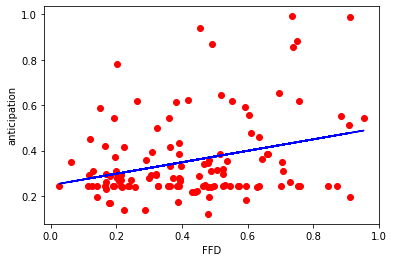

In [54]:
X = anticipation_ds[['FFD']]
y = anticipation_ds['Anticipation']

regressor = LinearRegression()
regressor.fit(X, y)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.xlabel('FFD')
plt.ylabel('Anticipation')

print ("coef: " + str(regressor.coef_[0]))
print ("intercept: " + str(regressor.intercept_))

### ZuCo - Disgust

In [23]:
disgust_ds = dataset[dataset.Disgust != 0]
X = disgust_ds[['MPS','TRT','GD','FFD']]
X = sm.add_constant(X)                
y = disgust_ds['Disgust']

model_disgust = be.backWardEliminationMLR(X,y)
model_disgust.summary()

const    0.032375
MPS      0.999679
TRT      0.894697
GD       0.310690
FFD      0.269217
dtype: float64
 
const    0.000372
TRT      0.890012
GD       0.301449
FFD      0.259810
dtype: float64
 
const    0.000296
GD       0.276604
FFD      0.255182
dtype: float64
 
const    0.000431
FFD      0.612548
dtype: float64
 
const    8.278955e-13
dtype: float64
 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Disgust   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                nan
Time:                        15:06:06   Log-Likelihood:                 3.3792
No. Observations:                  33   AIC:                            -4.758
Df Residuals:                      32   BIC:                            -3.262
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4403      0.039     11.405      0.000       0.362       0.519
==============================================================================
Omnibus:                        1.697   Durbin-Watson:                   2.607
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.395
Skew:                           0.491   Prob(JB):                        0.498
Kurtosis:                       2.776   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ZuCo - Fear

In [24]:
fear_ds = dataset[dataset.Fear != 0]
X = fear_ds[['MPS','TRT','GD','FFD']]
X = sm.add_constant(X)                
y = fear_ds['Fear']

model_fear = be.backWardEliminationMLR(X,y)
model_fear.summary()

const    0.102529
MPS      0.050749
TRT      0.987065
GD       0.557025
FFD      0.454896
dtype: float64
 
const    0.080042
MPS      0.038713
GD       0.490560
FFD      0.446802
dtype: float64
 
const    0.074928
MPS      0.033222
FFD      0.514040
dtype: float64
 
const    0.001071
MPS      0.041003
dtype: float64
 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fear   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.353
Date:                Mon, 16 Nov 2020   Prob (F-statistic):             0.0410
Time:                        15:06:45   Log-Likelihood:                 39.650
No. Observations:                  65   AIC:                            -75.30
Df Residuals:                      63   BIC:                            -70.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1518      0.044      3.430      0.001       0.063       0.240
MPS            0.1691      0.081      2.086      0.041       0.007       0.331
==============================================================================
Omnibus:                        2.493   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.288   Jarque-Bera (JB):                2.377
Skew:                           0.454   Prob(JB):                        0.305
Kurtosis:                       2.768   Cond. No.                         6.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coef: 0.16909576085920955
intercept: 0.15179481258484728


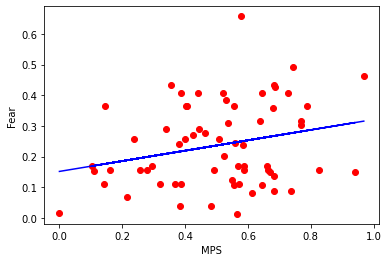

In [55]:
X = fear_ds[['MPS']]
y = fear_ds['Fear']

regressor = LinearRegression()
regressor.fit(X, y)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.xlabel('MPS')
plt.ylabel('Fear')

print ("coef: " + str(regressor.coef_[0]))
print ("intercept: " + str(regressor.intercept_))

### ZuCo - Joy

In [25]:
joy_ds = dataset[dataset.Joy != 0]
X = joy_ds[['MPS','TRT','GD','FFD']]
X = sm.add_constant(X)                
y = joy_ds['Joy']

model_joy = be.backWardEliminationMLR(X,y)
model_joy.summary()

const    0.000395
MPS      0.726911
TRT      0.062750
GD       0.659989
FFD      0.205118
dtype: float64
 
const    1.350053e-09
TRT      4.593570e-02
GD       6.607156e-01
FFD      1.904236e-01
dtype: float64
 
const    1.239812e-09
TRT      1.485540e-02
FFD      1.563907e-03
dtype: float64
 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Joy   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     7.055
Date:                Mon, 16 Nov 2020   Prob (F-statistic):            0.00126
Time:                        15:07:46   Log-Likelihood:                 50.409
No. Observations:                 126   AIC:                            -94.82
Df Residuals:                     123   BIC:                            -86.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2162      0.033      6.576      0.000       0.151       0.281
TRT           -0.5192      0.210     -2.471      0.015      -0.935      -0.103
FFD            0.7464      0.231      3.235      0.002       0.290       1.203
==============================================================================
Omnibus:                       23.375   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.136
Skew:                           0.975   Prob(JB):                     1.05e-07
Kurtosis:                       4.524   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ZuCo - Sadness

In [26]:
sadness_ds = dataset[dataset.Sadness != 0]
X = sadness_ds[['MPS','TRT','GD','FFD']]
X = sm.add_constant(X)                
y = sadness_ds['Sadness']

model_sadness = be.backWardEliminationMLR(X,y)
model_sadness.summary()

const    0.887044
MPS      0.039822
TRT      0.198820
GD       0.863648
FFD      0.434358
dtype: float64
 
const    0.916591
MPS      0.026440
TRT      0.108452
FFD      0.100287
dtype: float64
 
const    0.393822
MPS      0.073032
FFD      0.721136
dtype: float64
 
const    0.098887
MPS      0.071865
dtype: float64
 
const    2.080045e-12
dtype: float64
 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Sadness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                nan
Time:                        15:08:48   Log-Likelihood:                -2.9794
No. Observations:                  61   AIC:                             7.959
Df Residuals:                      60   BIC:                             10.07
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2889      0.033      8.808      0.000       0.223       0.355
==============================================================================
Omnibus:                       10.216   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.288
Skew:                           0.984   Prob(JB):                      0.00583
Kurtosis:                       3.416   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ZuCo - Surprise

In [28]:
surprise_ds = dataset[dataset.Surprise != 0]
X = surprise_ds[['MPS','TRT','GD','FFD']]
X = sm.add_constant(X)                
y = surprise_ds['Surprise']

model_surprise = be.backWardEliminationMLR(X,y)
model_surprise.summary()

const    0.080931
MPS      0.409219
TRT      0.344391
GD       0.292099
FFD      0.421309
dtype: float64
 
const    0.076308
MPS      0.391236
TRT      0.337692
GD       0.363228
dtype: float64
 
const    0.000145
TRT      0.388138
GD       0.430474
dtype: float64
 
const    0.000002
TRT      0.700421
dtype: float64
 
const    2.653073e-13
dtype: float64
 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Surprise   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 16 Nov 2020   Prob (F-statistic):                nan
Time:                        15:09:37   Log-Likelihood:                 7.4775
No. Observations:                  38   AIC:                            -12.95
Df Residuals:                      37   BIC:                            -11.32
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3618      0.033     11.073      0.000       0.296       0.428
==============================================================================
Omnibus:                       11.483   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.957
Skew:                           1.160   Prob(JB):                      0.00418
Kurtosis:                       4.242   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ZuCo - Trust

In [29]:
trust_ds = dataset[dataset.Trust != 0]
X = trust_ds[['MPS','TRT','GD','FFD']]
X = sm.add_constant(X)                
y = trust_ds['Trust']

model_trust = be.backWardEliminationMLR(X,y)
model_trust.summary()

const    0.000203
MPS      0.369061
TRT      0.360158
GD       0.891879
FFD      0.526389
dtype: float64
 
const    0.000196
MPS      0.368260
TRT      0.346196
FFD      0.012485
dtype: float64
 
const    6.109544e-09
TRT      2.474818e-01
FFD      4.311826e-03
dtype: float64
 
const    4.019470e-10
FFD      2.664519e-09
dtype: float64
 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Trust   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     38.83
Date:                Mon, 16 Nov 2020   Prob (F-statistic):           2.66e-09
Time:                        15:10:41   Log-Likelihood:                 113.79
No. Observations:                 203   AIC:                            -223.6
Df Residuals:                     201   BIC:                            -216.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1315      0.020      6.579      0.000       0.092       0.171
FFD            0.2933      0.047      6.231      0.000       0.200       0.386
==============================================================================
Omnibus:                       61.212   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.786
Skew:                           1.382   Prob(JB):                     7.30e-31
Kurtosis:                       5.961   Cond. No.                         5.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coef: 0.29330035524279985
intercept: 0.13145081046400786


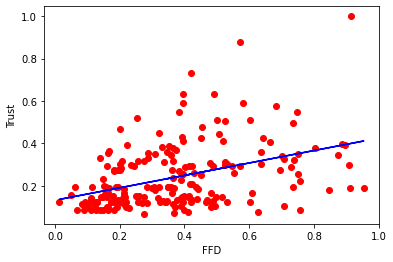

In [59]:
X = trust_ds[['FFD']]
y = trust_ds['Trust']

regressor = LinearRegression()
regressor.fit(X, y)

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.xlabel('FFD')
plt.ylabel('Trust')

print ("coef: " + str(regressor.coef_[0]))
print ("intercept: " + str(regressor.intercept_))